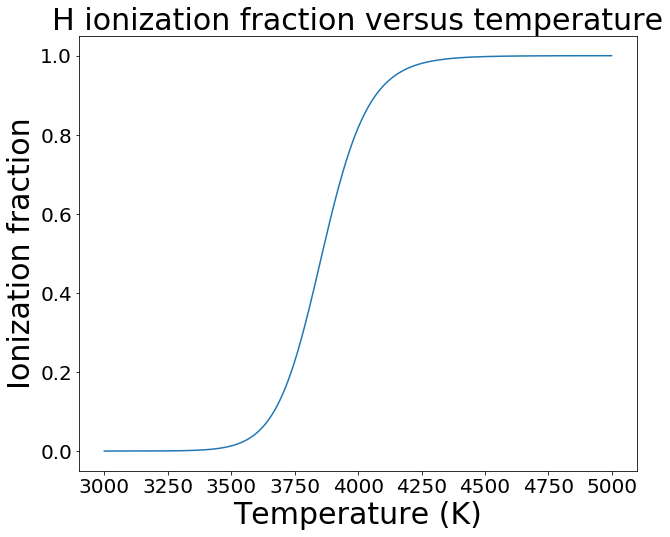

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u

font1=30
font2=20
ne=1*1e9 ## HII region tipical density
u1=1
u0=2
chi={'H':[13.6*u.eV],'C':[1086.5,2352.6,4620.5,6222.7,37831,47277]*u.kJ/c.N_A/u.mole}
# get the ratio: N_(l+1)/N_l
def getK(T,element_str='H',level=0):    
    return np.array(2*u1/u0/ne*(2 * np.pi * c.m_e * c.k_B * T / c.h**2)**1.5* np.exp(-chi[element_str][level] / (c.k_B * T)))

T = np.arange(3000,5000,1)*u.K
K_T=getK(T,'H',0)

X=K_T/(1+K_T)

plt.figure(figsize=(10,8))
plt.plot(T,X)
plt.title('H ionization fraction versus temperature',fontsize=font1)
plt.xlabel('Temperature (K)',fontsize=font1)
plt.ylabel('Ionization fraction',fontsize=font1)
plt.tick_params(labelsize=font2)
plt.savefig('H_ionization.png',format='png')
plt.show()

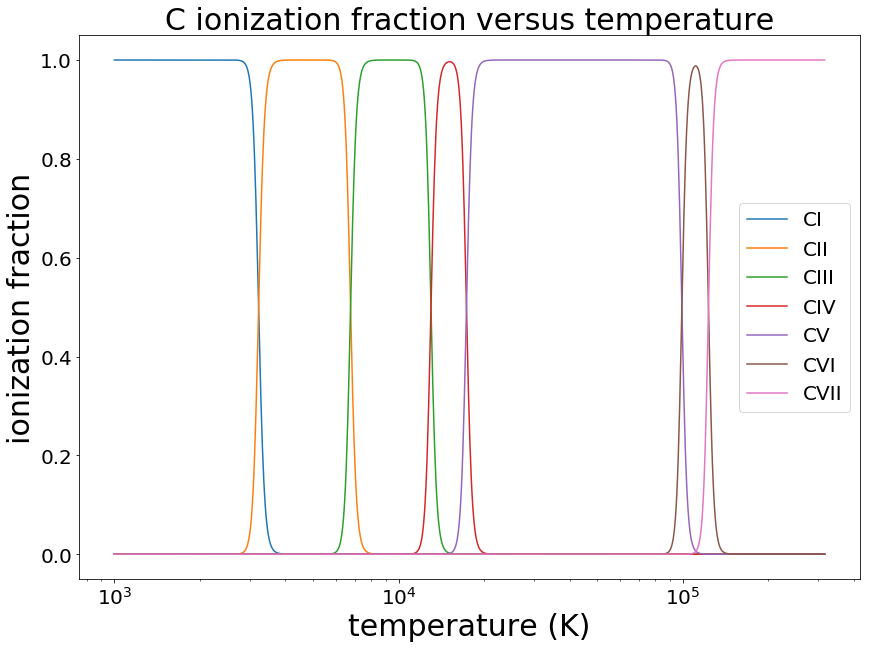

In [2]:
T = np.logspace(3,5.5,1000)*u.K
label_C=['CI','CII','CIII','CIV','CV','CVI','CVII']
K_T=[1]
K_all=1
for each in range(6):
    result=getK(T,'C',each)*K_T[each]
    K_T.append(result)
    K_all=K_all+result
X_T=[1/K_all]
for each in range(6):
    X_T.append(K_T[each+1]/K_all)


plt.figure(figsize=(14,10))
for each in range(0,7):
    plt.semilogx(T,X_T[each],label=label_C[each])
plt.title('C ionization fraction versus temperature',fontsize=font1)
plt.xlabel('temperature (K)',fontsize=font1)
plt.ylabel('ionization fraction',fontsize=font1)
plt.tick_params(labelsize=font2)
plt.legend(fontsize=font2)
plt.savefig('C_ionization.png',format='png')
plt.show()

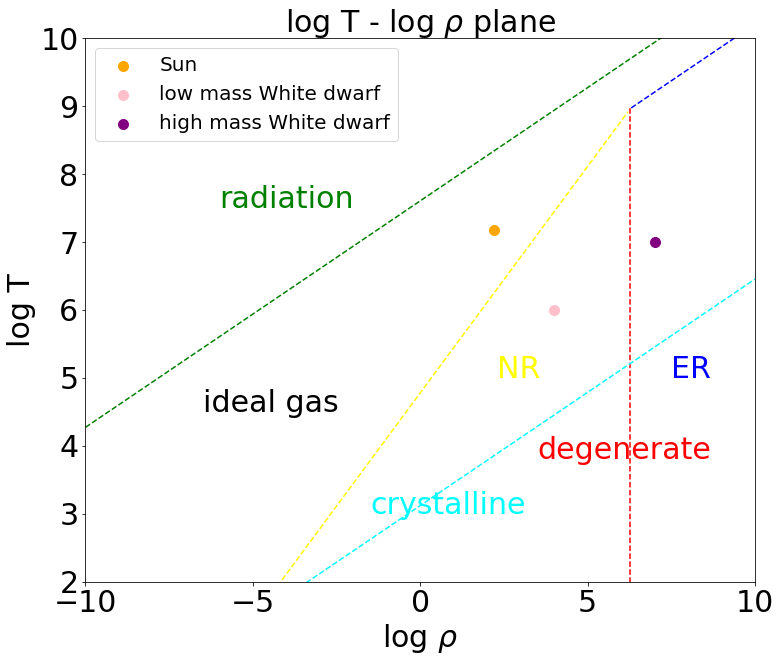

In [30]:
KNR=1.0036e13
KER=1.2435e15
logdensity_er_nr=3*np.log10(KER/KNR)
logT_er_nr=2/3*logdensity_er_nr-np.log10(2*c.R.cgs.value/KNR)
a=7.56e-15
crystall=np.log10(2.25e5/170)
logT_sun=np.log10(1.5e7)
logdensity_sun=np.log10(160)
logdensity_low_wd=4
logT_low_wd=6
logdensity_high_wd=7
logT_high_wd=7

plt.figure(figsize=(12,10))
logdensity = np.linspace(-10, 10, num = 201)
logT_gas_nr=2/3*logdensity[logdensity<logdensity_er_nr]-np.log10(2*c.R.cgs.value/KNR)
logT_gas_er=1/3*logdensity[logdensity>logdensity_er_nr]-np.log10(2*c.R.cgs.value/KER)
logT_gas_rad=1/3*logdensity+1/3*np.log10(6*c.R.cgs.value/a)
logT_crystall=1/3*logdensity+crystall
plt.plot(logdensity[logdensity<logdensity_er_nr],logT_gas_nr,'--',color='yellow')
plt.plot(logdensity[logdensity>logdensity_er_nr],logT_gas_er,'--',color='blue')
plt.plot(logdensity,logT_gas_rad,'--',color='green')
plt.plot(logdensity,logT_crystall,'--',color='cyan')
plt.vlines(logdensity_er_nr,ymin=0,ymax=logT_er_nr,color='red',linestyle='dashed')
plt.xlabel(r'log $\rho$',fontsize=font1)
plt.ylabel(r'log T',fontsize=font1)
plt.title(r'log T - log $\rho$ plane',fontsize=font1)
plt.tick_params(labelsize=font1)
plt.axis([-10,10,2,10])
plt.text(-6,7.5,'radiation',fontsize=font1,color='green')
plt.text(-6.5,4.5,'ideal gas',fontsize=font1)
plt.text(2.3,5,'NR',fontsize=font1,color='yellow')
plt.text(7.5,5,'ER',fontsize=font1,color='blue')
plt.text(3.5,3.8,'degenerate',fontsize=font1,color='red')
plt.text(-1.5,3,'crystalline',fontsize=font1,color='cyan')
plt.scatter(logdensity_sun,logT_sun,label='Sun',color='orange',s=100)
plt.scatter(logdensity_low_wd,logT_low_wd,label='low mass White dwarf',color='pink',s=100)
plt.scatter(logdensity_high_wd,logT_high_wd,label='high mass White dwarf',color='purple',s=100)
plt.legend(fontsize=font2)
plt.savefig('logT-logrho.png',format='png')
plt.show()

In [270]:
print(c.k_B.cgs.value)
c.e.esu**2/c.k_B.cgs*(4*np.pi/3/c.m_p.cgs)**(1/3)

1.3806488e-16


<Quantity 226921.62781402795 Fr2 K / (erg g(1/3))>

In [289]:
26.734*u.MeV.to(u.erg)

4.283258828871e-05

In [295]:
2*8.977e37/4/np.pi/c.au**2

<Quantity 638411251827209.0 1 / m2>

In [291]:
4.002603*c.m_p

<Quantity 6.694840942485531e-27 kg>